In [1]:
from os.path import join

import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
import numpy as np

In [2]:
fig_width = 6
fig_height = 5

params = {
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 12,
    #'text.fontsize': 8, # was 10
    'legend.fontsize': 12, # was 10
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': False,
    'figure.figsize': [fig_width,fig_height],
    'font.family': 'serif',
    'grid.linestyle': '--',
}

matplotlib.rcParams.update(params)

In [3]:
output_dir = join('..', 'plots', 'stream_exp')

In [4]:
model_dtype = pd.api.types.CategoricalDtype(categories=['Characteristic Sets', 'Weak Summary',
                                                     'SemSets', 'SchemEX', 'TermPicker', 'SchemEX+U+I'], ordered=True)

metric_dtype = pd.api.types.CategoricalDtype(categories=['triples', 'primary vertices'], ordered=True)

In [5]:
metric_dtype.categories[0]

'triples'

In [6]:
def plot_bars(df, dataset):
    for bisimK in range(3):
        kf = df[df['k'] == bisimK].copy()
        kf['model'] = kf['model'].astype(model_dtype)
        kf['metric'] = kf['metric'].astype(metric_dtype)
        ddf = kf.set_index(['model', 'metric'])['relative']


        pdf = ddf.unstack()
        #print(pdf)
        pdf = pdf.sort_values(by=['model'], axis=0, ascending=True)

    #    if bisimK != 0:
    #        plt.rcParams['figure.figsize'] = [fig_width,4]
    #    else:
    #        plt.rcParams['figure.figsize'] = [fig_width,5.5]

        ax = pdf.plot(kind='bar', color=['lightblue', 'firebrick'], width=.75, rot=45)
        ax.set_ylim([0,100])
        # ax.legend(plot_methods.values())
        # ax.set_xticklabels([f'({int(i.left)}, {int(i.right)}]' for i in bins.cat.categories])
        ax.set_ylabel("% of data graph")
        ax.set_xlabel("")
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1), shadow=True, ncol=3)

    #    if bisimK != 0:
    #        ax.get_legend().remove()

        plt.title(dataset + ' dataset, k=%s' % bisimK)
        plt.tight_layout()
        plt.grid()
        plt.savefig(output_dir + '/' + dataset + '_'+ str(bisimK) + '-compression_summarization.pdf', bbox_inches='tight', format='pdf', dpi=300)
        plt.savefig(output_dir + '/' + dataset + '_'+ str(bisimK) + '-compression_summarization.png', bbox_inches='tight', format='png', dpi=300)

In [7]:
# TimBL11M data
df = pd.DataFrame(columns=['k', 'model', 'metric', 'absolute', 'relative'])
def make_row(k, model, metric, absolute, relative):
    return {'k': k, 'model': model, 'metric': metric, 'absolute': absolute, 'relative': relative}

df = df.append(make_row(0, 'Characteristic Sets', metric_dtype.categories[0], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(0, 'Characteristic Sets', metric_dtype.categories[1], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(1, 'Characteristic Sets', metric_dtype.categories[0], 0.7, 6.5), ignore_index=True)
df = df.append(make_row(1, 'Characteristic Sets', metric_dtype.categories[1], 9.6, 1.4), ignore_index=True)
df = df.append(make_row(2, 'Characteristic Sets', metric_dtype.categories[0], 1.6, 14.6), ignore_index=True)
df = df.append(make_row(2, 'Characteristic Sets', metric_dtype.categories[1], 37.2, 5.5), ignore_index=True)

df = df.append(make_row(0, 'Weak Summary', metric_dtype.categories[0], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(0, 'Weak Summary', metric_dtype.categories[1], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(1, 'Weak Summary', metric_dtype.categories[0], 1.9, 17.9), ignore_index=True)
df = df.append(make_row(1, 'Weak Summary', metric_dtype.categories[1], 74, 0.1), ignore_index=True)
df = df.append(make_row(2, 'Weak Summary', metric_dtype.categories[0], 1.1, 9.9), ignore_index=True)
df = df.append(make_row(2, 'Weak Summary', metric_dtype.categories[1], 50, 0.1), ignore_index=True)

df = df.append(make_row(0, 'SemSets', metric_dtype.categories[0], 0.3, 2.9), ignore_index=True)
df = df.append(make_row(0, 'SemSets', metric_dtype.categories[1], 2.8, 0.4), ignore_index=True)
df = df.append(make_row(1, 'SemSets', metric_dtype.categories[0], 7.6, 69.2), ignore_index=True)
df = df.append(make_row(1, 'SemSets', metric_dtype.categories[1], 139.0, 20.6), ignore_index=True)
df = df.append(make_row(2, 'SemSets', metric_dtype.categories[0], 7.6, 69.2), ignore_index=True)
df = df.append(make_row(2, 'SemSets', metric_dtype.categories[1], 139.0, 20.6), ignore_index=True)

df = df.append(make_row(0, 'SchemEX', metric_dtype.categories[0], 0.3, 2.9), ignore_index=True)
df = df.append(make_row(0, 'SchemEX', metric_dtype.categories[1], 2.8, 0.4), ignore_index=True)
df = df.append(make_row(1, 'SchemEX', metric_dtype.categories[0], 0.8, 6.9), ignore_index=True)
df = df.append(make_row(1, 'SchemEX', metric_dtype.categories[1], 12.0, 1.8), ignore_index=True)
df = df.append(make_row(2, 'SchemEX', metric_dtype.categories[0], 1.4, 12.5), ignore_index=True)
df = df.append(make_row(2, 'SchemEX', metric_dtype.categories[1], 27.7, 4.1), ignore_index=True)

df = df.append(make_row(0, 'TermPicker', metric_dtype.categories[0], 0.3, 2.9), ignore_index=True)
df = df.append(make_row(0, 'TermPicker', metric_dtype.categories[1], 2.8, 0.4), ignore_index=True)
df = df.append(make_row(1, 'TermPicker', metric_dtype.categories[0], 0.7, 6.5), ignore_index=True)
df = df.append(make_row(1, 'TermPicker', metric_dtype.categories[1], 10.8, 1.6), ignore_index=True)
df = df.append(make_row(2, 'TermPicker', metric_dtype.categories[0], 1.8, 16.0), ignore_index=True)
df = df.append(make_row(2, 'TermPicker', metric_dtype.categories[1], 37.3, 5.5), ignore_index=True)

df = df.append(make_row(0, 'SchemEX+U+I', metric_dtype.categories[0], 0.4, 3.8), ignore_index=True)
df = df.append(make_row(0, 'SchemEX+U+I', metric_dtype.categories[1], 3.1, 0.5), ignore_index=True)
df = df.append(make_row(1, 'SchemEX+U+I', metric_dtype.categories[0], 0.8, 7.1), ignore_index=True)
df = df.append(make_row(1, 'SchemEX+U+I', metric_dtype.categories[1], 11.3, 1.7), ignore_index=True)
df = df.append(make_row(2, 'SchemEX+U+I', metric_dtype.categories[0], 1.8, 15.9), ignore_index=True)
df = df.append(make_row(2, 'SchemEX+U+I', metric_dtype.categories[1], 31.0, 4.6), ignore_index=True)


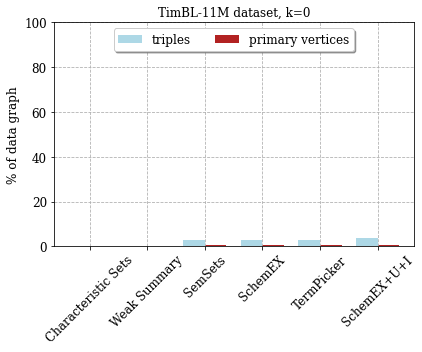

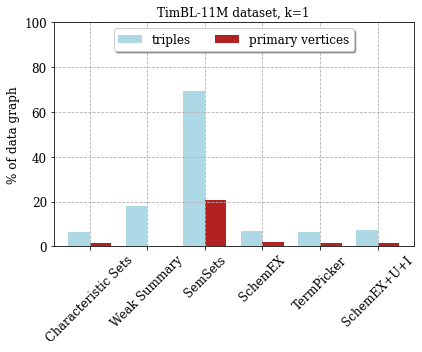

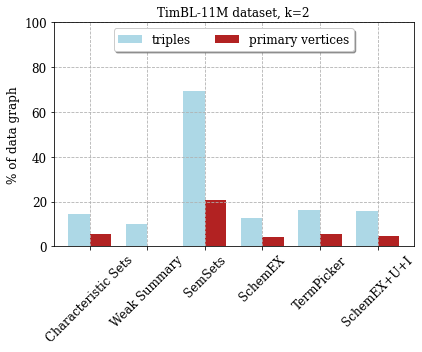

In [8]:
plot_bars(df, 'TimBL-11M')

In [9]:
df

,k,model,metric,absolute,relative
0,0,Characteristic Sets,triples,NaN,NaN
1,0,Characteristic Sets,primary vertices,NaN,NaN
2,1,Characteristic Sets,triples,0.7,6.5
3,1,Characteristic Sets,primary vertices,9.6,1.4
4,2,Characteristic Sets,triples,1.6,14.6
5,2,Characteristic Sets,primary vertices,37.2,5.5
6,0,Weak Summary,triples,NaN,NaN
7,0,Weak Summary,primary vertices,NaN,NaN
8,1,Weak Summary,triples,1.9,17.9
9,1,Weak Summary,primary vertices,74.0,0.1


In [10]:
df['dataset'] = 'timbl'
timbl = pd.pivot_table(df.dropna(subset=['absolute', 'relative']), values='relative', index=['k', 'model', 'dataset'], columns=['metric'])
timbl

metric                         primary vertices  triples
k model               dataset                           
0 SchemEX             timbl                 0.4      2.9
  SchemEX+U+I         timbl                 0.5      3.8
  SemSets             timbl                 0.4      2.9
  TermPicker          timbl                 0.4      2.9
1 Characteristic Sets timbl                 1.4      6.5
  SchemEX             timbl                 1.8      6.9
  SchemEX+U+I         timbl                 1.7      7.1
  SemSets             timbl                20.6     69.2
  TermPicker          timbl                 1.6      6.5
  Weak Summary        timbl                 0.1     17.9
2 Characteristic Sets timbl                 5.5     14.6
  SchemEX             timbl                 4.1     12.5
  SchemEX+U+I         timbl                 4.6     15.9
  SemSets             timbl                20.6     69.2
  TermPicker          timbl                 5.5     16.0
  Weak Summary        timbl                 0.1      9.9

In [11]:
# DyLDO-127M data
df = pd.DataFrame(columns=['k', 'model', 'metric', 'absolute', 'relative'])
def make_row(k, model, metric, absolute, relative):
    return {'k': k, 'model': model, 'metric': metric, 'absolute': absolute, 'relative': relative}

df = df.append(make_row(0, 'Characteristic Sets', metric_dtype.categories[0], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(0, 'Characteristic Sets', metric_dtype.categories[1], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(1, 'Characteristic Sets', metric_dtype.categories[0], 0.6, 0.5), ignore_index=True)
df = df.append(make_row(1, 'Characteristic Sets', metric_dtype.categories[1], 23.0, 0.3), ignore_index=True)
df = df.append(make_row(2, 'Characteristic Sets', metric_dtype.categories[0], 2.1, 1.7), ignore_index=True)
df = df.append(make_row(2, 'Characteristic Sets', metric_dtype.categories[1], 112.8, 1.6), ignore_index=True)

df = df.append(make_row(0, 'Weak Summary', metric_dtype.categories[0], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(0, 'Weak Summary', metric_dtype.categories[1], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(1, 'Weak Summary', metric_dtype.categories[0], 14.8, 9.0), ignore_index=True)
df = df.append(make_row(1, 'Weak Summary', metric_dtype.categories[1], 394, 0.1), ignore_index=True)
df = df.append(make_row(2, 'Weak Summary', metric_dtype.categories[0], 25.1, 19.7), ignore_index=True)
df = df.append(make_row(2, 'Weak Summary', metric_dtype.categories[1], 102, 0.1), ignore_index=True)

df = df.append(make_row(0, 'SemSets', metric_dtype.categories[0], 4.1, 3.2), ignore_index=True)
df = df.append(make_row(0, 'SemSets', metric_dtype.categories[1], 46.6, 0.7), ignore_index=True)
df = df.append(make_row(1, 'SemSets', metric_dtype.categories[0], 45.3, 35.6), ignore_index=True)
df = df.append(make_row(1, 'SemSets', metric_dtype.categories[1], 1733.5, 25.0), ignore_index=True)
df = df.append(make_row(2, 'SemSets', metric_dtype.categories[0], 45.3, 35.6), ignore_index=True)
df = df.append(make_row(2, 'SemSets', metric_dtype.categories[1], 1733.5, 25.0), ignore_index=True)

df = df.append(make_row(0, 'SchemEX', metric_dtype.categories[0], 4.1, 3.2), ignore_index=True)
df = df.append(make_row(0, 'SchemEX', metric_dtype.categories[1], 46.6, 0.7), ignore_index=True)
df = df.append(make_row(1, 'SchemEX', metric_dtype.categories[0], 15.7, 12.3), ignore_index=True)
df = df.append(make_row(1, 'SchemEX', metric_dtype.categories[1], 254.5, 3.6), ignore_index=True)
df = df.append(make_row(2, 'SchemEX', metric_dtype.categories[0], 19.8, 15.6), ignore_index=True)
df = df.append(make_row(2, 'SchemEX', metric_dtype.categories[1], 431.1, 6.1), ignore_index=True)

df = df.append(make_row(0, 'TermPicker', metric_dtype.categories[0], 4.1, 3.2), ignore_index=True)
df = df.append(make_row(0, 'TermPicker', metric_dtype.categories[1], 46.6, 0.7), ignore_index=True)
df = df.append(make_row(1, 'TermPicker', metric_dtype.categories[0], 11.1, 8.7), ignore_index=True)
df = df.append(make_row(1, 'TermPicker', metric_dtype.categories[1], 238.4, 3.4), ignore_index=True)
df = df.append(make_row(2, 'TermPicker', metric_dtype.categories[0], 25.4, 19.9), ignore_index=True)
df = df.append(make_row(2, 'TermPicker', metric_dtype.categories[1], 559.1, 7.9), ignore_index=True)

df = df.append(make_row(0, 'SchemEX+U+I', metric_dtype.categories[0], 8.5, 6.7), ignore_index=True)
df = df.append(make_row(0, 'SchemEX+U+I', metric_dtype.categories[1], 53.0, 0.8), ignore_index=True)
df = df.append(make_row(1, 'SchemEX+U+I', metric_dtype.categories[0], 19.9, 15.7), ignore_index=True)
df = df.append(make_row(1, 'SchemEX+U+I', metric_dtype.categories[1], 249.5, 3.5), ignore_index=True)
df = df.append(make_row(2, 'SchemEX+U+I', metric_dtype.categories[0], 22.9, 18), ignore_index=True)
df = df.append(make_row(2, 'SchemEX+U+I', metric_dtype.categories[1], 466.9, 6.6), ignore_index=True)



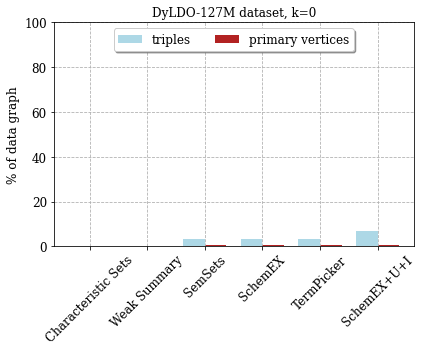

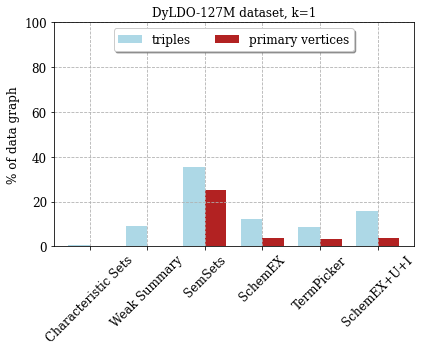

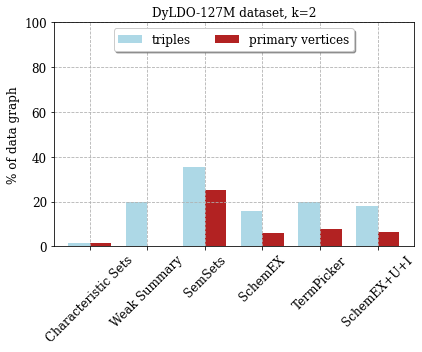

In [12]:
plot_bars(df, 'DyLDO-127M')

In [13]:
df['dataset'] = 'dyldo'
dyldo = pd.pivot_table(df.dropna(subset=['absolute', 'relative']), values='relative', index=['k', 'model', 'dataset'], columns=['metric'])
dyldo

metric                         primary vertices  triples
k model               dataset                           
0 SchemEX             dyldo                 0.7      3.2
  SchemEX+U+I         dyldo                 0.8      6.7
  SemSets             dyldo                 0.7      3.2
  TermPicker          dyldo                 0.7      3.2
1 Characteristic Sets dyldo                 0.3      0.5
  SchemEX             dyldo                 3.6     12.3
  SchemEX+U+I         dyldo                 3.5     15.7
  SemSets             dyldo                25.0     35.6
  TermPicker          dyldo                 3.4      8.7
  Weak Summary        dyldo                 0.1      9.0
2 Characteristic Sets dyldo                 1.6      1.7
  SchemEX             dyldo                 6.1     15.6
  SchemEX+U+I         dyldo                 6.6     18.0
  SemSets             dyldo                25.0     35.6
  TermPicker          dyldo                 7.9     19.9
  Weak Summary        dyldo                 0.1     19.7

In [14]:
# Fitting Linear Regression to the dataset 
from sklearn.linear_model import LinearRegression 
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 

from scipy.stats import normaltest
from scipy.stats import pearsonr
from scipy.stats import spearmanr

def scatter_plot_regression(df, x_value, y_value):

    # D'Agostino's K-squared test
    stat, p = normaltest(df[x_value])
    if p > 0.05:
        print("[D'Agostino's K-squared test] %s follows normal distribution" % x_value)
    else:
        print("[D'Agostino's K-squared test] %s does not follow normal distribution" % x_value)

    print('stat=%.4f, p=%.4f' % (stat, p))
            
    stat, p = normaltest(df[y_value])
    
    if p > 0.05:
        print("[D'Agostino's K-squared test] %s follows normal distribution" % y_value)
    else:
        print("[D'Agostino's K-squared test] %s does not follow normal distribution" % y_value)
        
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    print("Is there a monotonic relationship between '%s' and '%s'?" % (x_value, y_value))
    corrtest = spearmanr(df[x_value], df[y_value])
    print("Spearman rank-order correlation coefficient of %.3f (p = %.6f)" % (round(corrtest[0], 3), round(corrtest[1], 6)))  
    
            
    print("Is there a linear correlation between '%s' and '%s'?" % (x_value, y_value))
    corrtest = pearsonr(df[x_value], df[y_value]) 
    print("Pearson Coefficient of %.3f (p = %.6f)" % (round(corrtest[0], 3), round(corrtest[1], 6)))    
    
    
    X = df[x_value].to_numpy() # , 'change-ratio'
    y = df[y_value].values
    #display(X)
    # make matrix
    X = X.reshape(-1, 1) 
    lin = LinearRegression() 

    print(X.shape)
    print(y.shape)
    lin.fit(X, y) 
    print("Linear Regression Coefficient of %.3f" % round(lin.coef_[0], 3))
    # Visualising the Linear Regression results 
    plt.scatter(X, y, color = 'blue') 
    #plt.scatter(b, y, color = 'green') 

    plt.plot(X, lin.predict(X), color = 'red') 
    plt.title('Linear Regression') 
    plt.xlabel(x_value) 
    plt.ylabel(y_value) 

    lin.score(X, y)
    #plt.savefig(out_dir + '/' + x_value + '-vs-' + y_value + '.pdf', bbox_inches = 'tight')
    # plt.savefig(out_dir + '/' + x_value + '-vs-' + y_value + '.png', bbox_inches = 'tight')
    plt.show() 

In [15]:
full_df = pd.concat([timbl, dyldo])
full_df

metric                         primary vertices  triples
k model               dataset                           
0 SchemEX             timbl                 0.4      2.9
  SchemEX+U+I         timbl                 0.5      3.8
  SemSets             timbl                 0.4      2.9
  TermPicker          timbl                 0.4      2.9
1 Characteristic Sets timbl                 1.4      6.5
  SchemEX             timbl                 1.8      6.9
  SchemEX+U+I         timbl                 1.7      7.1
  SemSets             timbl                20.6     69.2
  TermPicker          timbl                 1.6      6.5
  Weak Summary        timbl                 0.1     17.9
2 Characteristic Sets timbl                 5.5     14.6
  SchemEX             timbl                 4.1     12.5
  SchemEX+U+I         timbl                 4.6     15.9
  SemSets             timbl                20.6     69.2
  TermPicker          timbl                 5.5     16.0
  Weak Summary        timbl                 0.1      9.9
0 SchemEX             dyldo                 0.7      3.2
  SchemEX+U+I         dyldo                 0.8      6.7
  SemSets             dyldo                 0.7      3.2
  TermPicker          dyldo                 0.7      3.2
1 Characteristic Sets dyldo                 0.3      0.5
  SchemEX             dyldo                 3.6     12.3
  SchemEX+U+I         dyldo                 3.5     15.7
  SemSets             dyldo                25.0     35.6
  TermPicker          dyldo                 3.4      8.7
  Weak Summary        dyldo                 0.1      9.0
2 Characteristic Sets dyldo                 1.6      1.7
  SchemEX             dyldo                 6.1     15.6
  SchemEX+U+I         dyldo                 6.6     18.0
  SemSets             dyldo                25.0     35.6
  TermPicker          dyldo                 7.9     19.9
  Weak Summary        dyldo                 0.1     19.7

[D'Agostino's K-squared test] primary vertices does not follow normal distribution
stat=21.7267, p=0.0000
[D'Agostino's K-squared test] triples does not follow normal distribution
stat=30.048, p=0.000
Is there a monotonic relationship between 'primary vertices' and 'triples'?
Spearman rank-order correlation coefficient of 0.642 (p = 0.000074)
Is there a linear correlation between 'primary vertices' and 'triples'?
Pearson Coefficient of 0.850 (p = 0.000000)
(32, 1)
(32,)
Linear Regression Coefficient of 1.950


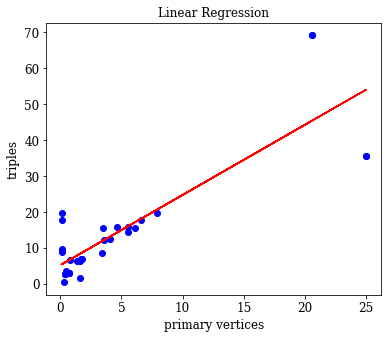

In [16]:
scatter_plot_regression(full_df, 'primary vertices', 'triples')

In [17]:
# new correlation

In [18]:
# TimBL11M data
df = pd.DataFrame(columns=['k', 'model', 'metric', 'absolute', 'relative'])
def make_row(k, model, metric, absolute, relative):
    return {'k': k, 'model': model, 'metric': metric, 'absolute': absolute, 'relative': relative}

df = df.append(make_row(0, 'Characteristic Sets', metric_dtype.categories[0], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(0, 'Characteristic Sets', metric_dtype.categories[1], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(1, 'Characteristic Sets', metric_dtype.categories[0], 0.7, 15.4), ignore_index=True)
df = df.append(make_row(1, 'Characteristic Sets', metric_dtype.categories[1], 9.6, 70.3), ignore_index=True)
df = df.append(make_row(2, 'Characteristic Sets', metric_dtype.categories[0], 1.6, 6.9), ignore_index=True)
df = df.append(make_row(2, 'Characteristic Sets', metric_dtype.categories[1], 37.2, 18.2), ignore_index=True)

df = df.append(make_row(0, 'Weak Summary', metric_dtype.categories[0], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(0, 'Weak Summary', metric_dtype.categories[1], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(1, 'Weak Summary', metric_dtype.categories[0], 1.9, 5.6), ignore_index=True)
df = df.append(make_row(1, 'Weak Summary', metric_dtype.categories[1], 74, 9162.2), ignore_index=True)
df = df.append(make_row(2, 'Weak Summary', metric_dtype.categories[0], 1.1, 10.1), ignore_index=True)
df = df.append(make_row(2, 'Weak Summary', metric_dtype.categories[1], 50, 13560.0), ignore_index=True)

df = df.append(make_row(0, 'SemSets', metric_dtype.categories[0], 0.3, 34.4), ignore_index=True)
df = df.append(make_row(0, 'SemSets', metric_dtype.categories[1], 2.8, 242.1), ignore_index=True)
df = df.append(make_row(1, 'SemSets', metric_dtype.categories[0], 7.6, 1.4), ignore_index=True)
df = df.append(make_row(1, 'SemSets', metric_dtype.categories[1], 139.0, 4.9), ignore_index=True)
df = df.append(make_row(2, 'SemSets', metric_dtype.categories[0], 7.6, 1.4), ignore_index=True)
df = df.append(make_row(2, 'SemSets', metric_dtype.categories[1], 139.0, 4.9), ignore_index=True)

df = df.append(make_row(0, 'SchemEX', metric_dtype.categories[0], 0.3, 34.4), ignore_index=True)
df = df.append(make_row(0, 'SchemEX', metric_dtype.categories[1], 2.8, 242.1), ignore_index=True)
df = df.append(make_row(1, 'SchemEX', metric_dtype.categories[0], 0.8, 14.5), ignore_index=True)
df = df.append(make_row(1, 'SchemEX', metric_dtype.categories[1], 12.0, 56.5), ignore_index=True)
df = df.append(make_row(2, 'SchemEX', metric_dtype.categories[0], 1.4, 8.0), ignore_index=True)
df = df.append(make_row(2, 'SchemEX', metric_dtype.categories[1], 27.7, 24.5), ignore_index=True)

df = df.append(make_row(0, 'TermPicker', metric_dtype.categories[0], 0.3, 34.4), ignore_index=True)
df = df.append(make_row(0, 'TermPicker', metric_dtype.categories[1], 2.8, 242.1), ignore_index=True)
df = df.append(make_row(1, 'TermPicker', metric_dtype.categories[0], 0.7, 15.4), ignore_index=True)
df = df.append(make_row(1, 'TermPicker', metric_dtype.categories[1], 10.8, 62.8), ignore_index=True)
df = df.append(make_row(2, 'TermPicker', metric_dtype.categories[0], 1.8, 6.1), ignore_index=True)
df = df.append(make_row(2, 'TermPicker', metric_dtype.categories[1], 37.3, 18.2), ignore_index=True)

df = df.append(make_row(0, 'SchemEX+U+I', metric_dtype.categories[0], 0.4, 26.2), ignore_index=True)
df = df.append(make_row(0, 'SchemEX+U+I', metric_dtype.categories[1], 3.1, 218.7), ignore_index=True)
df = df.append(make_row(1, 'SchemEX+U+I', metric_dtype.categories[0], 0.8, 14.0), ignore_index=True)
df = df.append(make_row(1, 'SchemEX+U+I', metric_dtype.categories[1], 11.3, 60.0), ignore_index=True)
df = df.append(make_row(2, 'SchemEX+U+I', metric_dtype.categories[0], 1.8, 6.3), ignore_index=True)
df = df.append(make_row(2, 'SchemEX+U+I', metric_dtype.categories[1], 31.0, 21.9), ignore_index=True)

In [19]:
df['dataset'] = 'TimBL-11M'
timbl = pd.pivot_table(df.dropna(subset=['absolute', 'relative']), values='relative', index=['k', 'model', 'dataset'], columns=['metric'])
timbl

metric                           primary vertices  triples
k model               dataset                             
0 SchemEX             TimBL-11M             242.1     34.4
  SchemEX+U+I         TimBL-11M             218.7     26.2
  SemSets             TimBL-11M             242.1     34.4
  TermPicker          TimBL-11M             242.1     34.4
1 Characteristic Sets TimBL-11M              70.3     15.4
  SchemEX             TimBL-11M              56.5     14.5
  SchemEX+U+I         TimBL-11M              60.0     14.0
  SemSets             TimBL-11M               4.9      1.4
  TermPicker          TimBL-11M              62.8     15.4
  Weak Summary        TimBL-11M            9162.2      5.6
2 Characteristic Sets TimBL-11M              18.2      6.9
  SchemEX             TimBL-11M              24.5      8.0
  SchemEX+U+I         TimBL-11M              21.9      6.3
  SemSets             TimBL-11M               4.9      1.4
  TermPicker          TimBL-11M              18.2      6.1
  Weak Summary        TimBL-11M           13560.0     10.1

In [20]:
# DyLDO-127M data
df = pd.DataFrame(columns=['k', 'model', 'metric', 'absolute', 'relative'])
def make_row(k, model, metric, absolute, relative):
    return {'k': k, 'model': model, 'metric': metric, 'absolute': absolute, 'relative': relative}

df = df.append(make_row(0, 'Characteristic Sets', metric_dtype.categories[0], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(0, 'Characteristic Sets', metric_dtype.categories[1], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(1, 'Characteristic Sets', metric_dtype.categories[0], 0.6, 208.7), ignore_index=True)
df = df.append(make_row(1, 'Characteristic Sets', metric_dtype.categories[1], 23.0, 306.1), ignore_index=True)
df = df.append(make_row(2, 'Characteristic Sets', metric_dtype.categories[0], 2.1, 59.5), ignore_index=True)
df = df.append(make_row(2, 'Characteristic Sets', metric_dtype.categories[1], 112.8, 62.4), ignore_index=True)

df = df.append(make_row(0, 'Weak Summary', metric_dtype.categories[0], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(0, 'Weak Summary', metric_dtype.categories[1], np.nan, np.nan), ignore_index=True)
df = df.append(make_row(1, 'Weak Summary', metric_dtype.categories[0], 14.8, 8.6), ignore_index=True)
df = df.append(make_row(1, 'Weak Summary', metric_dtype.categories[1], 394, 17868.0), ignore_index=True)
df = df.append(make_row(2, 'Weak Summary', metric_dtype.categories[0], 25.1, 5.1), ignore_index=True)
df = df.append(make_row(2, 'Weak Summary', metric_dtype.categories[1], 102, 69019.6), ignore_index=True)

df = df.append(make_row(0, 'SemSets', metric_dtype.categories[0], 4.1, 31.1), ignore_index=True)
df = df.append(make_row(0, 'SemSets', metric_dtype.categories[1], 46.6, 151.1), ignore_index=True)
df = df.append(make_row(1, 'SemSets', metric_dtype.categories[0], 45.3, 2.8), ignore_index=True)
df = df.append(make_row(1, 'SemSets', metric_dtype.categories[1], 1733.5, 4.1), ignore_index=True)
df = df.append(make_row(2, 'SemSets', metric_dtype.categories[0], 45.3, 2.8), ignore_index=True)
df = df.append(make_row(2, 'SemSets', metric_dtype.categories[1], 1733.5, 4.1), ignore_index=True)

df = df.append(make_row(0, 'SchemEX', metric_dtype.categories[0], 4.1, 31.1), ignore_index=True)
df = df.append(make_row(0, 'SchemEX', metric_dtype.categories[1], 46.6, 151.1), ignore_index=True)
df = df.append(make_row(1, 'SchemEX', metric_dtype.categories[0], 15.7, 8.1), ignore_index=True)
df = df.append(make_row(1, 'SchemEX', metric_dtype.categories[1], 254.5, 27.7), ignore_index=True)
df = df.append(make_row(2, 'SchemEX', metric_dtype.categories[0], 19.8, 6.4), ignore_index=True)
df = df.append(make_row(2, 'SchemEX', metric_dtype.categories[1], 431.1, 16.3), ignore_index=True)

df = df.append(make_row(0, 'TermPicker', metric_dtype.categories[0], 4.1, 31.1), ignore_index=True)
df = df.append(make_row(0, 'TermPicker', metric_dtype.categories[1], 46.6, 151.1), ignore_index=True)
df = df.append(make_row(1, 'TermPicker', metric_dtype.categories[0], 11.1, 11.5), ignore_index=True)
df = df.append(make_row(1, 'TermPicker', metric_dtype.categories[1], 238.4, 29.5), ignore_index=True)
df = df.append(make_row(2, 'TermPicker', metric_dtype.categories[0], 25.4, 5.0), ignore_index=True)
df = df.append(make_row(2, 'TermPicker', metric_dtype.categories[1], 559.1, 12.6), ignore_index=True)

df = df.append(make_row(0, 'SchemEX+U+I', metric_dtype.categories[0], 8.5, 15.0), ignore_index=True)
df = df.append(make_row(0, 'SchemEX+U+I', metric_dtype.categories[1], 53.0, 132.8), ignore_index=True)
df = df.append(make_row(1, 'SchemEX+U+I', metric_dtype.categories[0], 19.9, 6.4), ignore_index=True)
df = df.append(make_row(1, 'SchemEX+U+I', metric_dtype.categories[1], 249.5, 28.2), ignore_index=True)
df = df.append(make_row(2, 'SchemEX+U+I', metric_dtype.categories[0], 22.9, 5.6), ignore_index=True)
df = df.append(make_row(2, 'SchemEX+U+I', metric_dtype.categories[1], 466.9, 15.1), ignore_index=True)

In [21]:
df['dataset'] = 'DyLDO-127M'
dyldo = pd.pivot_table(df.dropna(subset=['absolute', 'relative']), values='relative', index=['k', 'model', 'dataset'], columns=['metric'])
dyldo

metric                            primary vertices  triples
k model               dataset                              
0 SchemEX             DyLDO-127M             151.1     31.1
  SchemEX+U+I         DyLDO-127M             132.8     15.0
  SemSets             DyLDO-127M             151.1     31.1
  TermPicker          DyLDO-127M             151.1     31.1
1 Characteristic Sets DyLDO-127M             306.1    208.7
  SchemEX             DyLDO-127M              27.7      8.1
  SchemEX+U+I         DyLDO-127M              28.2      6.4
  SemSets             DyLDO-127M               4.1      2.8
  TermPicker          DyLDO-127M              29.5     11.5
  Weak Summary        DyLDO-127M           17868.0      8.6
2 Characteristic Sets DyLDO-127M              62.4     59.5
  SchemEX             DyLDO-127M              16.3      6.4
  SchemEX+U+I         DyLDO-127M              15.1      5.6
  SemSets             DyLDO-127M               4.1      2.8
  TermPicker          DyLDO-127M              12.6      5.0
  Weak Summary        DyLDO-127M           69019.6      5.1

In [22]:
full_df = pd.concat([timbl, dyldo])
full_df

metric                            primary vertices  triples
k model               dataset                              
0 SchemEX             TimBL-11M              242.1     34.4
  SchemEX+U+I         TimBL-11M              218.7     26.2
  SemSets             TimBL-11M              242.1     34.4
  TermPicker          TimBL-11M              242.1     34.4
1 Characteristic Sets TimBL-11M               70.3     15.4
  SchemEX             TimBL-11M               56.5     14.5
  SchemEX+U+I         TimBL-11M               60.0     14.0
  SemSets             TimBL-11M                4.9      1.4
  TermPicker          TimBL-11M               62.8     15.4
  Weak Summary        TimBL-11M             9162.2      5.6
2 Characteristic Sets TimBL-11M               18.2      6.9
  SchemEX             TimBL-11M               24.5      8.0
  SchemEX+U+I         TimBL-11M               21.9      6.3
  SemSets             TimBL-11M                4.9      1.4
  TermPicker          TimBL-11M               18.2      6.1
  Weak Summary        TimBL-11M            13560.0     10.1
0 SchemEX             DyLDO-127M             151.1     31.1
  SchemEX+U+I         DyLDO-127M             132.8     15.0
  SemSets             DyLDO-127M             151.1     31.1
  TermPicker          DyLDO-127M             151.1     31.1
1 Characteristic Sets DyLDO-127M             306.1    208.7
  SchemEX             DyLDO-127M              27.7      8.1
  SchemEX+U+I         DyLDO-127M              28.2      6.4
  SemSets             DyLDO-127M               4.1      2.8
  TermPicker          DyLDO-127M              29.5     11.5
  Weak Summary        DyLDO-127M           17868.0      8.6
2 Characteristic Sets DyLDO-127M              62.4     59.5
  SchemEX             DyLDO-127M              16.3      6.4
  SchemEX+U+I         DyLDO-127M              15.1      5.6
  SemSets             DyLDO-127M               4.1      2.8
  TermPicker          DyLDO-127M              12.6      5.0
  Weak Summary        DyLDO-127M           69019.6      5.1

[D'Agostino's K-squared test] primary vertices does not follow normal distribution
stat=67.2961, p=0.0000
[D'Agostino's K-squared test] triples does not follow normal distribution
stat=64.404, p=0.000
Is there a monotonic relationship between 'primary vertices' and 'triples'?
Spearman rank-order correlation coefficient of 0.636 (p = 0.000092)
Is there a linear correlation between 'primary vertices' and 'triples'?
Pearson Coefficient of -0.107 (p = 0.560144)
(32, 1)
(32,)
Linear Regression Coefficient of -0.000


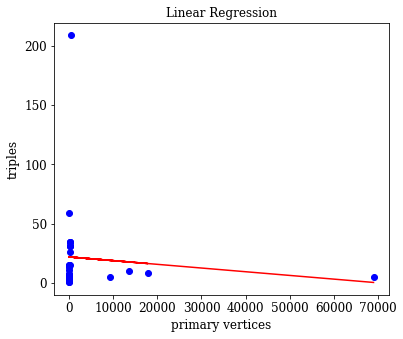

In [23]:
scatter_plot_regression(full_df, 'primary vertices', 'triples')

In [24]:
data_dir = join('..', 'data', 'stream_experiment-results')
datasets =  ['TimBL-11M','DyLDO-127M']
cache_sizes = ['1k','100k','200k']
suffix = '_alternative'

output_dir = join('..', 'plots', 'stream_exp')

model_dtype = pd.api.types.CategoricalDtype(categories=['Characteristic Sets', 'Weak Summary',
                                                     'SemSets', 'SchemEX', 'TermPicker', 'SchemEX+U+oI',
                                                     'SchemEX+U+pI'], ordered=True)

config_dtype = pd.api.types.CategoricalDtype(categories=['SQ - 1T', 'SQ - 100T', 'SQ - 200T', 
                                                         'CQ - 1T', 'CQ - 100T', 'CQ - 200T'], ordered=True)

In [44]:
quality = {}

for dataset in datasets:
    for cache_size in cache_sizes:    
        # Load dataframe from CSV
        with open(join(data_dir, dataset +suffix + '.csv'), 'r') as f:
            df = pd.read_csv(f)
            
        #display(df.iloc[0:30])
        # fig, ax = plt.subplots(figsize=(15,7))
        
        df['cache'] = df['cache'].str.strip()
        df['query'] = df['query'].str.strip()
        df['model'] = df['model'].str.strip()
        
        kf = df[df['cache'] == cache_size].copy()
        kf.loc[(kf['model'] == 'W-Property Clique'), 'model'] = 'Weak Summary'
        
        # delete the on-the-fly inferencing
        kf.loc[(kf['model'] == 'SchemEX+U+pI'), 'model'] = 'SchemEX+U+I'
        kf.drop(kf.loc[(kf['model'] == 'SchemEX+U+oI')].index, inplace=True)
        display(kf.loc[(kf['model'] == 'SchemEX+U+oI')].index)
        
        
        #display(kf)
      #  kf['config'] = kf['config'].str.replace('k', 'T')
      #  kf['config'] = kf['config'].astype(config_dtype)
      #  ddf = kf.set_index(['model', 'config'])['f1']
    
        kf['dataset'] = dataset
        test = pd.pivot_table(kf, values='f1', index=['k', 'model', 'dataset', 'query'])
        #display(test)
        
        
        
        last_config = None
        for i, row in test.iterrows():
            #print(i)
            foo = f"{i[0]}{i[1]}{i[2]}"
            if last_config and last_config == foo:
                # print(f"delete {i}")
                test.drop(i, inplace=True)
            
            last_config = foo
              
            
        test = test.droplevel('query')
        if cache_size in quality:
            quality[cache_size] = pd.concat([quality[cache_size], test]) 
        else:
            quality[cache_size] = test
        #display(test)

        
#        if bisimK != 0:
#            plt.rcParams['figure.figsize'] = [fig_width,4]
#        else:
#            plt.rcParams['figure.figsize'] = [fig_width,5.5]
 

Int64Index([], dtype='int64')

Int64Index([], dtype='int64')

Int64Index([], dtype='int64')

Int64Index([], dtype='int64')

Int64Index([], dtype='int64')

Int64Index([], dtype='int64')

In [50]:
quality['1k']

f1
k model               dataset         
0 SchemEX             TimBL-11M   0.94
  SchemEX+U+I         TimBL-11M   0.92
  SemSets             TimBL-11M   0.94
  TermPicker          TimBL-11M   0.94
1 Characteristic Sets TimBL-11M   0.60
  SchemEX             TimBL-11M   0.39
  SchemEX+U+I         TimBL-11M   0.49
  SemSets             TimBL-11M   0.39
  TermPicker          TimBL-11M   0.14
  Weak Summary        TimBL-11M   0.76
2 Characteristic Sets TimBL-11M   0.04
  SchemEX             TimBL-11M   0.11
  SchemEX+U+I         TimBL-11M   0.16
  SemSets             TimBL-11M   0.26
  TermPicker          TimBL-11M   0.04
  Weak Summary        TimBL-11M   0.42
0 SchemEX             DyLDO-127M  0.56
  SchemEX+U+I         DyLDO-127M  0.57
  SemSets             DyLDO-127M  0.56
  TermPicker          DyLDO-127M  0.56
1 Characteristic Sets DyLDO-127M  0.68
  SchemEX             DyLDO-127M  0.16
  SchemEX+U+I         DyLDO-127M  0.39
  SemSets             DyLDO-127M  0.31
  TermPicker          DyLDO-127M  0.12
  Weak Summary        DyLDO-127M  0.89
2 Characteristic Sets DyLDO-127M  0.03
  SchemEX             DyLDO-127M  0.08
  SchemEX+U+I         DyLDO-127M  0.07
  SemSets             DyLDO-127M  0.23
  TermPicker          DyLDO-127M  0.04
  Weak Summary        DyLDO-127M  0.51

In [51]:
full_df

metric                            primary vertices  triples
k model               dataset                              
0 SchemEX             TimBL-11M              242.1     34.4
  SchemEX+U+I         TimBL-11M              218.7     26.2
  SemSets             TimBL-11M              242.1     34.4
  TermPicker          TimBL-11M              242.1     34.4
1 Characteristic Sets TimBL-11M               70.3     15.4
  SchemEX             TimBL-11M               56.5     14.5
  SchemEX+U+I         TimBL-11M               60.0     14.0
  SemSets             TimBL-11M                4.9      1.4
  TermPicker          TimBL-11M               62.8     15.4
  Weak Summary        TimBL-11M             9162.2      5.6
2 Characteristic Sets TimBL-11M               18.2      6.9
  SchemEX             TimBL-11M               24.5      8.0
  SchemEX+U+I         TimBL-11M               21.9      6.3
  SemSets             TimBL-11M                4.9      1.4
  TermPicker          TimBL-11M               18.2      6.1
  Weak Summary        TimBL-11M            13560.0     10.1
0 SchemEX             DyLDO-127M             151.1     31.1
  SchemEX+U+I         DyLDO-127M             132.8     15.0
  SemSets             DyLDO-127M             151.1     31.1
  TermPicker          DyLDO-127M             151.1     31.1
1 Characteristic Sets DyLDO-127M             306.1    208.7
  SchemEX             DyLDO-127M              27.7      8.1
  SchemEX+U+I         DyLDO-127M              28.2      6.4
  SemSets             DyLDO-127M               4.1      2.8
  TermPicker          DyLDO-127M              29.5     11.5
  Weak Summary        DyLDO-127M           17868.0      8.6
2 Characteristic Sets DyLDO-127M              62.4     59.5
  SchemEX             DyLDO-127M              16.3      6.4
  SchemEX+U+I         DyLDO-127M              15.1      5.6
  SemSets             DyLDO-127M               4.1      2.8
  TermPicker          DyLDO-127M              12.6      5.0
  Weak Summary        DyLDO-127M           69019.6      5.1

[D'Agostino's K-squared test] primary vertices does not follow normal distribution
stat=67.2961, p=0.0000
[D'Agostino's K-squared test] f1 follows normal distribution
stat=4.529, p=0.104
Is there a monotonic relationship between 'primary vertices' and 'f1'?
Spearman rank-order correlation coefficient of 0.734 (p = 0.000002)
Is there a linear correlation between 'primary vertices' and 'f1'?
Pearson Coefficient of 0.157 (p = 0.391398)
(32, 1)
(32,)
Linear Regression Coefficient of 0.000


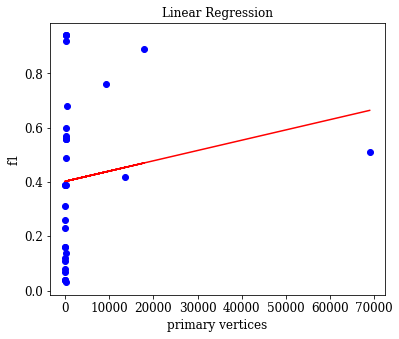

In [56]:
scatter_plot_regression(pd.concat([full_df, quality['1k']], axis=1), 'primary vertices', 'f1')

[D'Agostino's K-squared test] primary vertices does not follow normal distribution
stat=67.2961, p=0.0000
[D'Agostino's K-squared test] f1 follows normal distribution
stat=4.117, p=0.128
Is there a monotonic relationship between 'primary vertices' and 'f1'?
Spearman rank-order correlation coefficient of 0.744 (p = 0.000001)
Is there a linear correlation between 'primary vertices' and 'f1'?
Pearson Coefficient of 0.169 (p = 0.356409)
(32, 1)
(32,)
Linear Regression Coefficient of 0.000


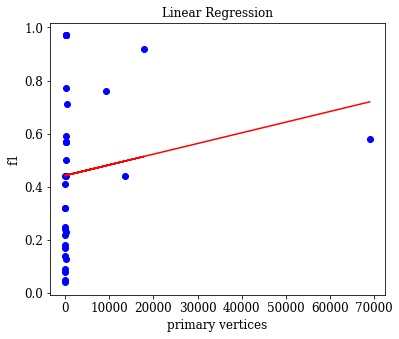

In [57]:
scatter_plot_regression(pd.concat([full_df, quality['100k']], axis=1), 'primary vertices', 'f1')

[D'Agostino's K-squared test] primary vertices does not follow normal distribution
stat=67.2961, p=0.0000
[D'Agostino's K-squared test] f1 follows normal distribution
stat=4.234, p=0.120
Is there a monotonic relationship between 'primary vertices' and 'f1'?
Spearman rank-order correlation coefficient of 0.742 (p = 0.000001)
Is there a linear correlation between 'primary vertices' and 'f1'?
Pearson Coefficient of 0.152 (p = 0.404901)
(32, 1)
(32,)
Linear Regression Coefficient of 0.000


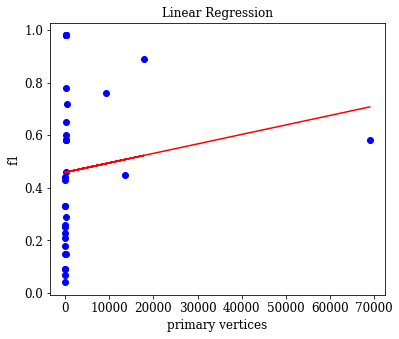

In [58]:
scatter_plot_regression(pd.concat([full_df, quality['200k']], axis=1), 'primary vertices', 'f1')